In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
import torch.nn.functional as F
from PIL import Image

In [2]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=41)

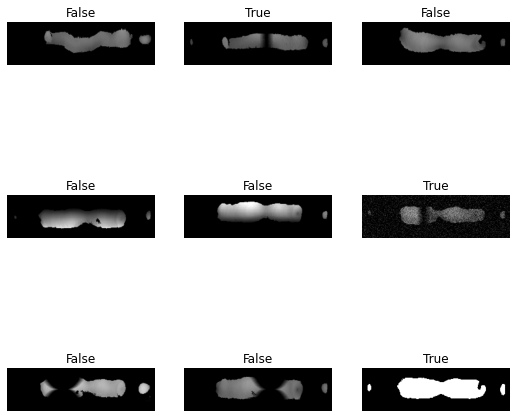

In [3]:
dls.show_batch()

In [4]:
precision = Precision()
f1 = F1Score()

In [5]:
learn = cnn_learner(dls, models.resnet34,normalize=True,pretrained=True,
                    metrics=[accuracy, precision, f1],opt_func=Adam)

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=9.999999747378752e-06)

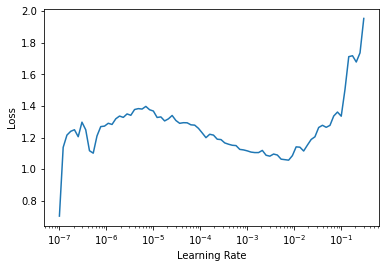

In [6]:
learn.lr_find()

In [7]:
learn.fit(5, lr=1e-03)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.260515,0.300169,0.857857,0.921008,0.846332,00:38
1,0.184113,0.166343,0.937143,0.943478,0.936691,00:38
2,0.186013,0.188064,0.920000,0.985149,0.914242,00:39
3,0.075394,0.077928,0.970000,0.958217,0.970381,00:38
4,0.118693,0.056200,0.983571,0.976090,0.983700,00:40


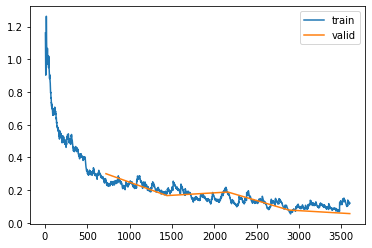

In [8]:
learn.recorder.plot_loss()

In [10]:
learn.freeze()

In [11]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.098640,0.089296,0.966429,0.993949,0.965467,00:39


epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.133843,0.080815,0.980714,0.974612,0.980837,01:07
1,0.095562,0.066396,0.983571,0.968188,0.983837,01:07
2,0.030110,0.029938,0.991429,0.988636,0.991453,01:06


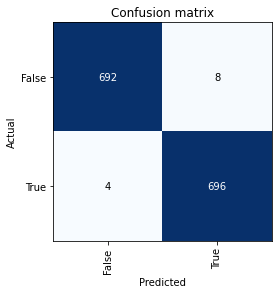

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()